<a href="https://colab.research.google.com/github/Dkiranmayee25/Exxploratory-Data-Analysis-EDA-/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Median Values
PassengerId    446.0000
Survived         0.0000

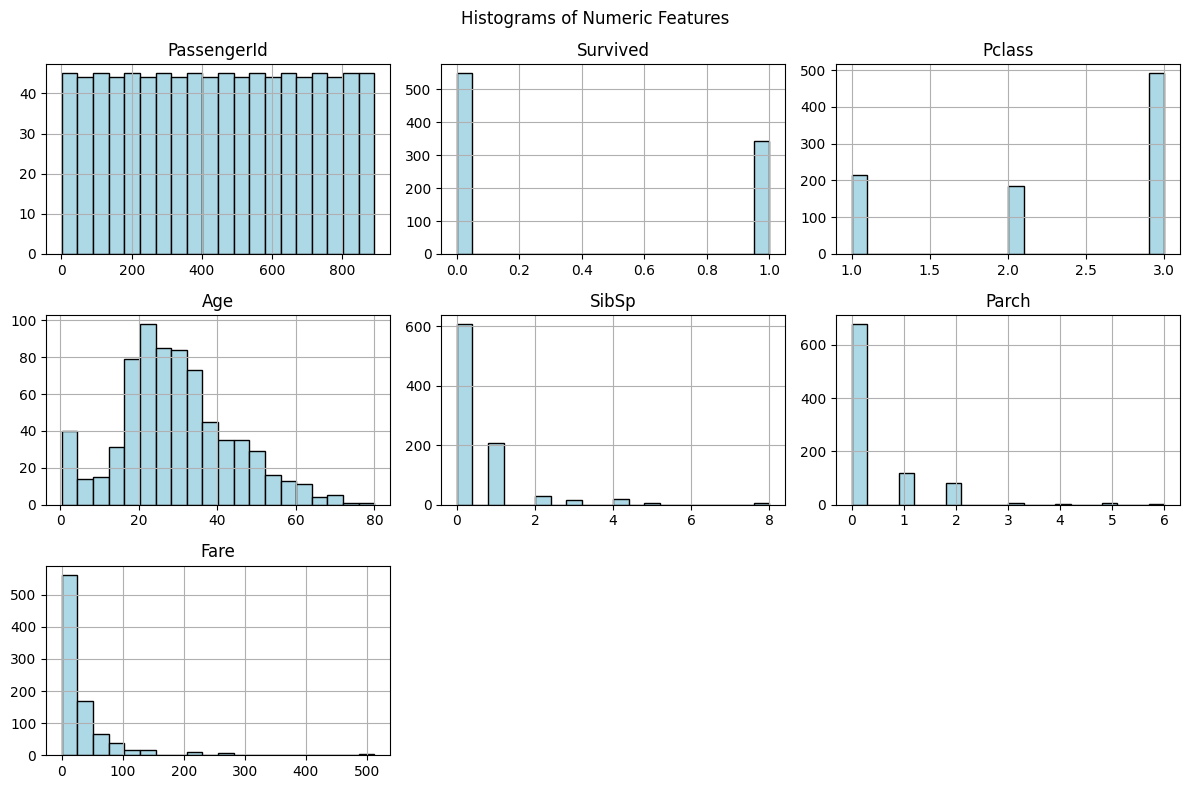

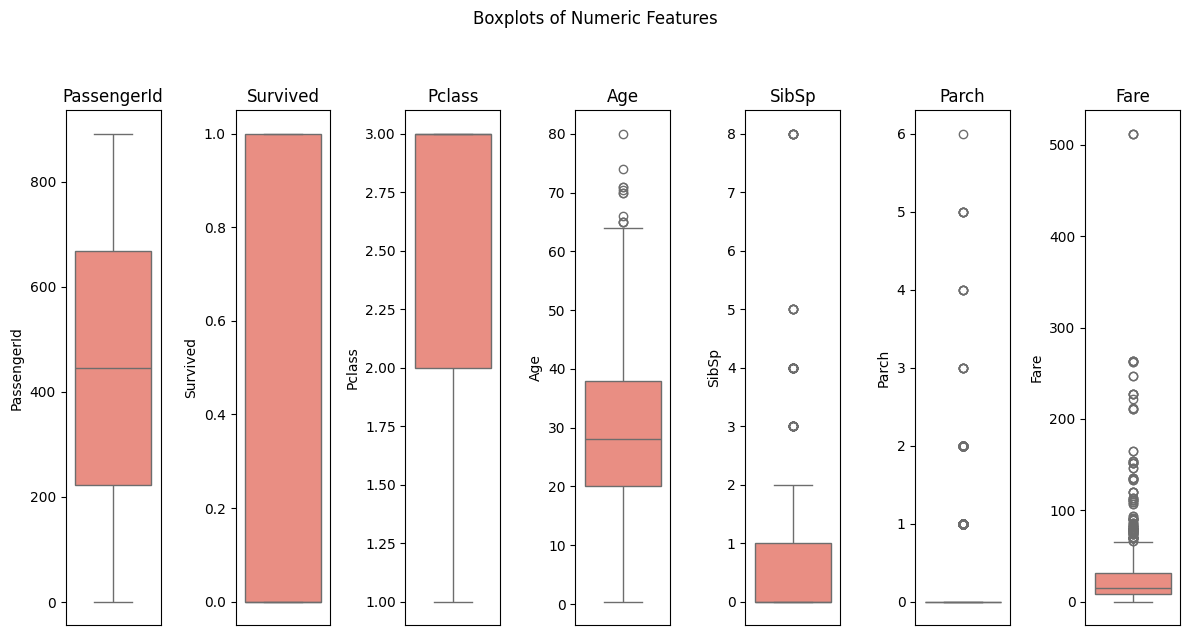

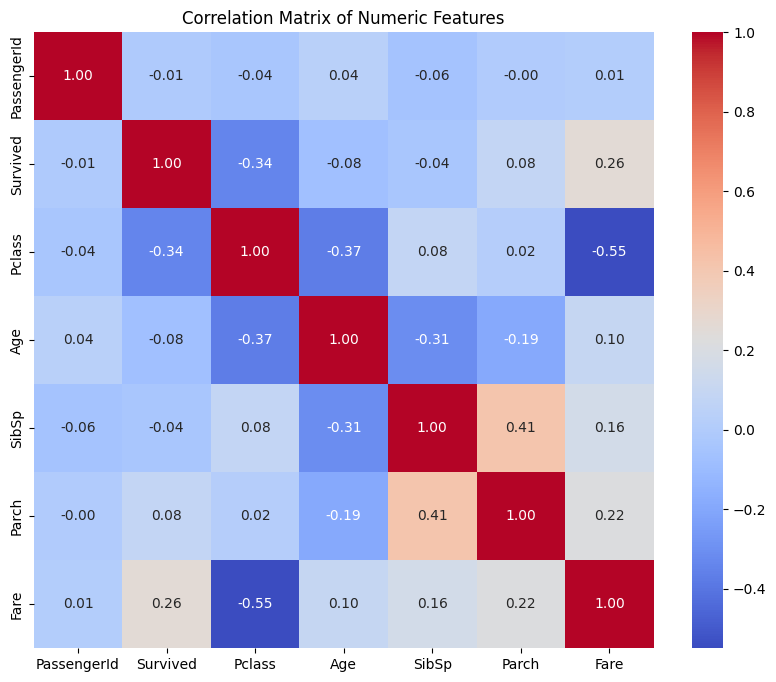

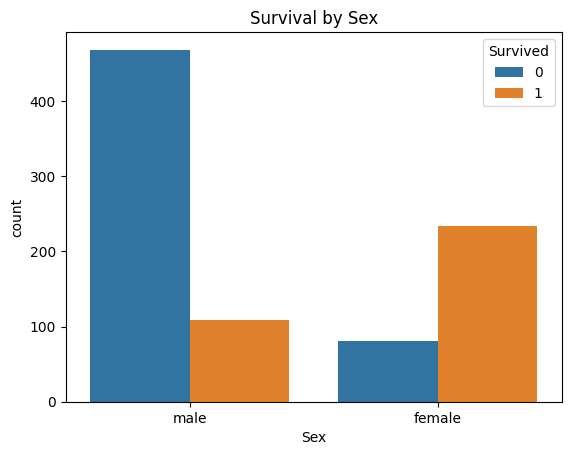

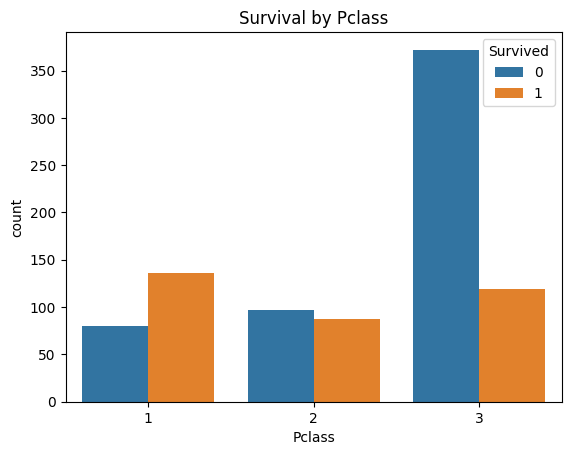


Observations
 PassengerId:
   - Fairly symmetric (skew = 0.00)
 Survived:
   - Fairly symmetric (skew = 0.48)
 Pclass:
   - Fairly symmetric (skew = -0.63)
 Age:
   - Missing values: 177
   - Fairly symmetric (skew = 0.39)
 SibSp:
   - Highly skewed (skew = 3.70)
 Parch:
   - Highly skewed (skew = 2.75)
 Fare:
   - Highly skewed (skew = 4.79)

Feature-Level Inferences
 PassengerId:
   - Mean (Survived = 1): 444.37
   - Mean (Survived = 0): 447.02
 Pclass:
   - Mean (Survived = 1): 1.95
   - Mean (Survived = 0): 2.53
 Age:
   - Mean (Survived = 1): 28.34
   - Mean (Survived = 0): 30.63
 SibSp:
   - Mean (Survived = 1): 0.47
   - Mean (Survived = 0): 0.55
 Parch:
   - Mean (Survived = 1): 0.46
   - Mean (Survived = 0): 0.33
 Fare:
   - Mean (Survived = 1): 48.40
   - Mean (Survived = 0): 22.12


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic-Dataset.csv")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Summary Statistics")
print(df[numeric_cols].describe())
print("\nMedian Values")
print(df[numeric_cols].median())
df[numeric_cols].hist(figsize=(12, 8), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(col)
    plt.xticks([])
plt.suptitle("Boxplots of Numeric Features", y=1.05)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Pclass")
plt.show()

print("\nObservations")
for col in numeric_cols:
    print(f" {col}:")
    if df[col].isnull().sum() > 0:
        print(f"   - Missing values: {df[col].isnull().sum()}")
    if df[col].skew() > 1:
        print(f"   - Highly skewed (skew = {df[col].skew():.2f})")
    elif df[col].skew() > 0.5:
        print(f"   - Moderately skewed (skew = {df[col].skew():.2f})")
    else:
        print(f"   - Fairly symmetric (skew = {df[col].skew():.2f})")
print("\nFeature-Level Inferences")
if 'Survived' in df.columns:
    for col in numeric_cols:
        if col != 'Survived':
            print(f" {col}:")
            print(f"   - Mean (Survived = 1): {df[df['Survived']==1][col].mean():.2f}")
            print(f"   - Mean (Survived = 0): {df[df['Survived']==0][col].mean():.2f}")
else:
    print("Survived column not found — skipping survival-based inference.")
